# Predict Heart Decease: Logistic Regression

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [4]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [5]:
df = pd.read_csv('Heart.csv')
df.head(2)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


In [6]:
df = pd.read_csv('Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
Age          297 non-null int64
Sex          297 non-null int64
ChestPain    297 non-null object
RestBP       297 non-null int64
Chol         297 non-null int64
Fbs          297 non-null int64
RestECG      297 non-null int64
MaxHR        297 non-null int64
ExAng        297 non-null int64
Oldpeak      297 non-null float64
Slope        297 non-null int64
Ca           297 non-null float64
Thal         297 non-null object
AHD          297 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


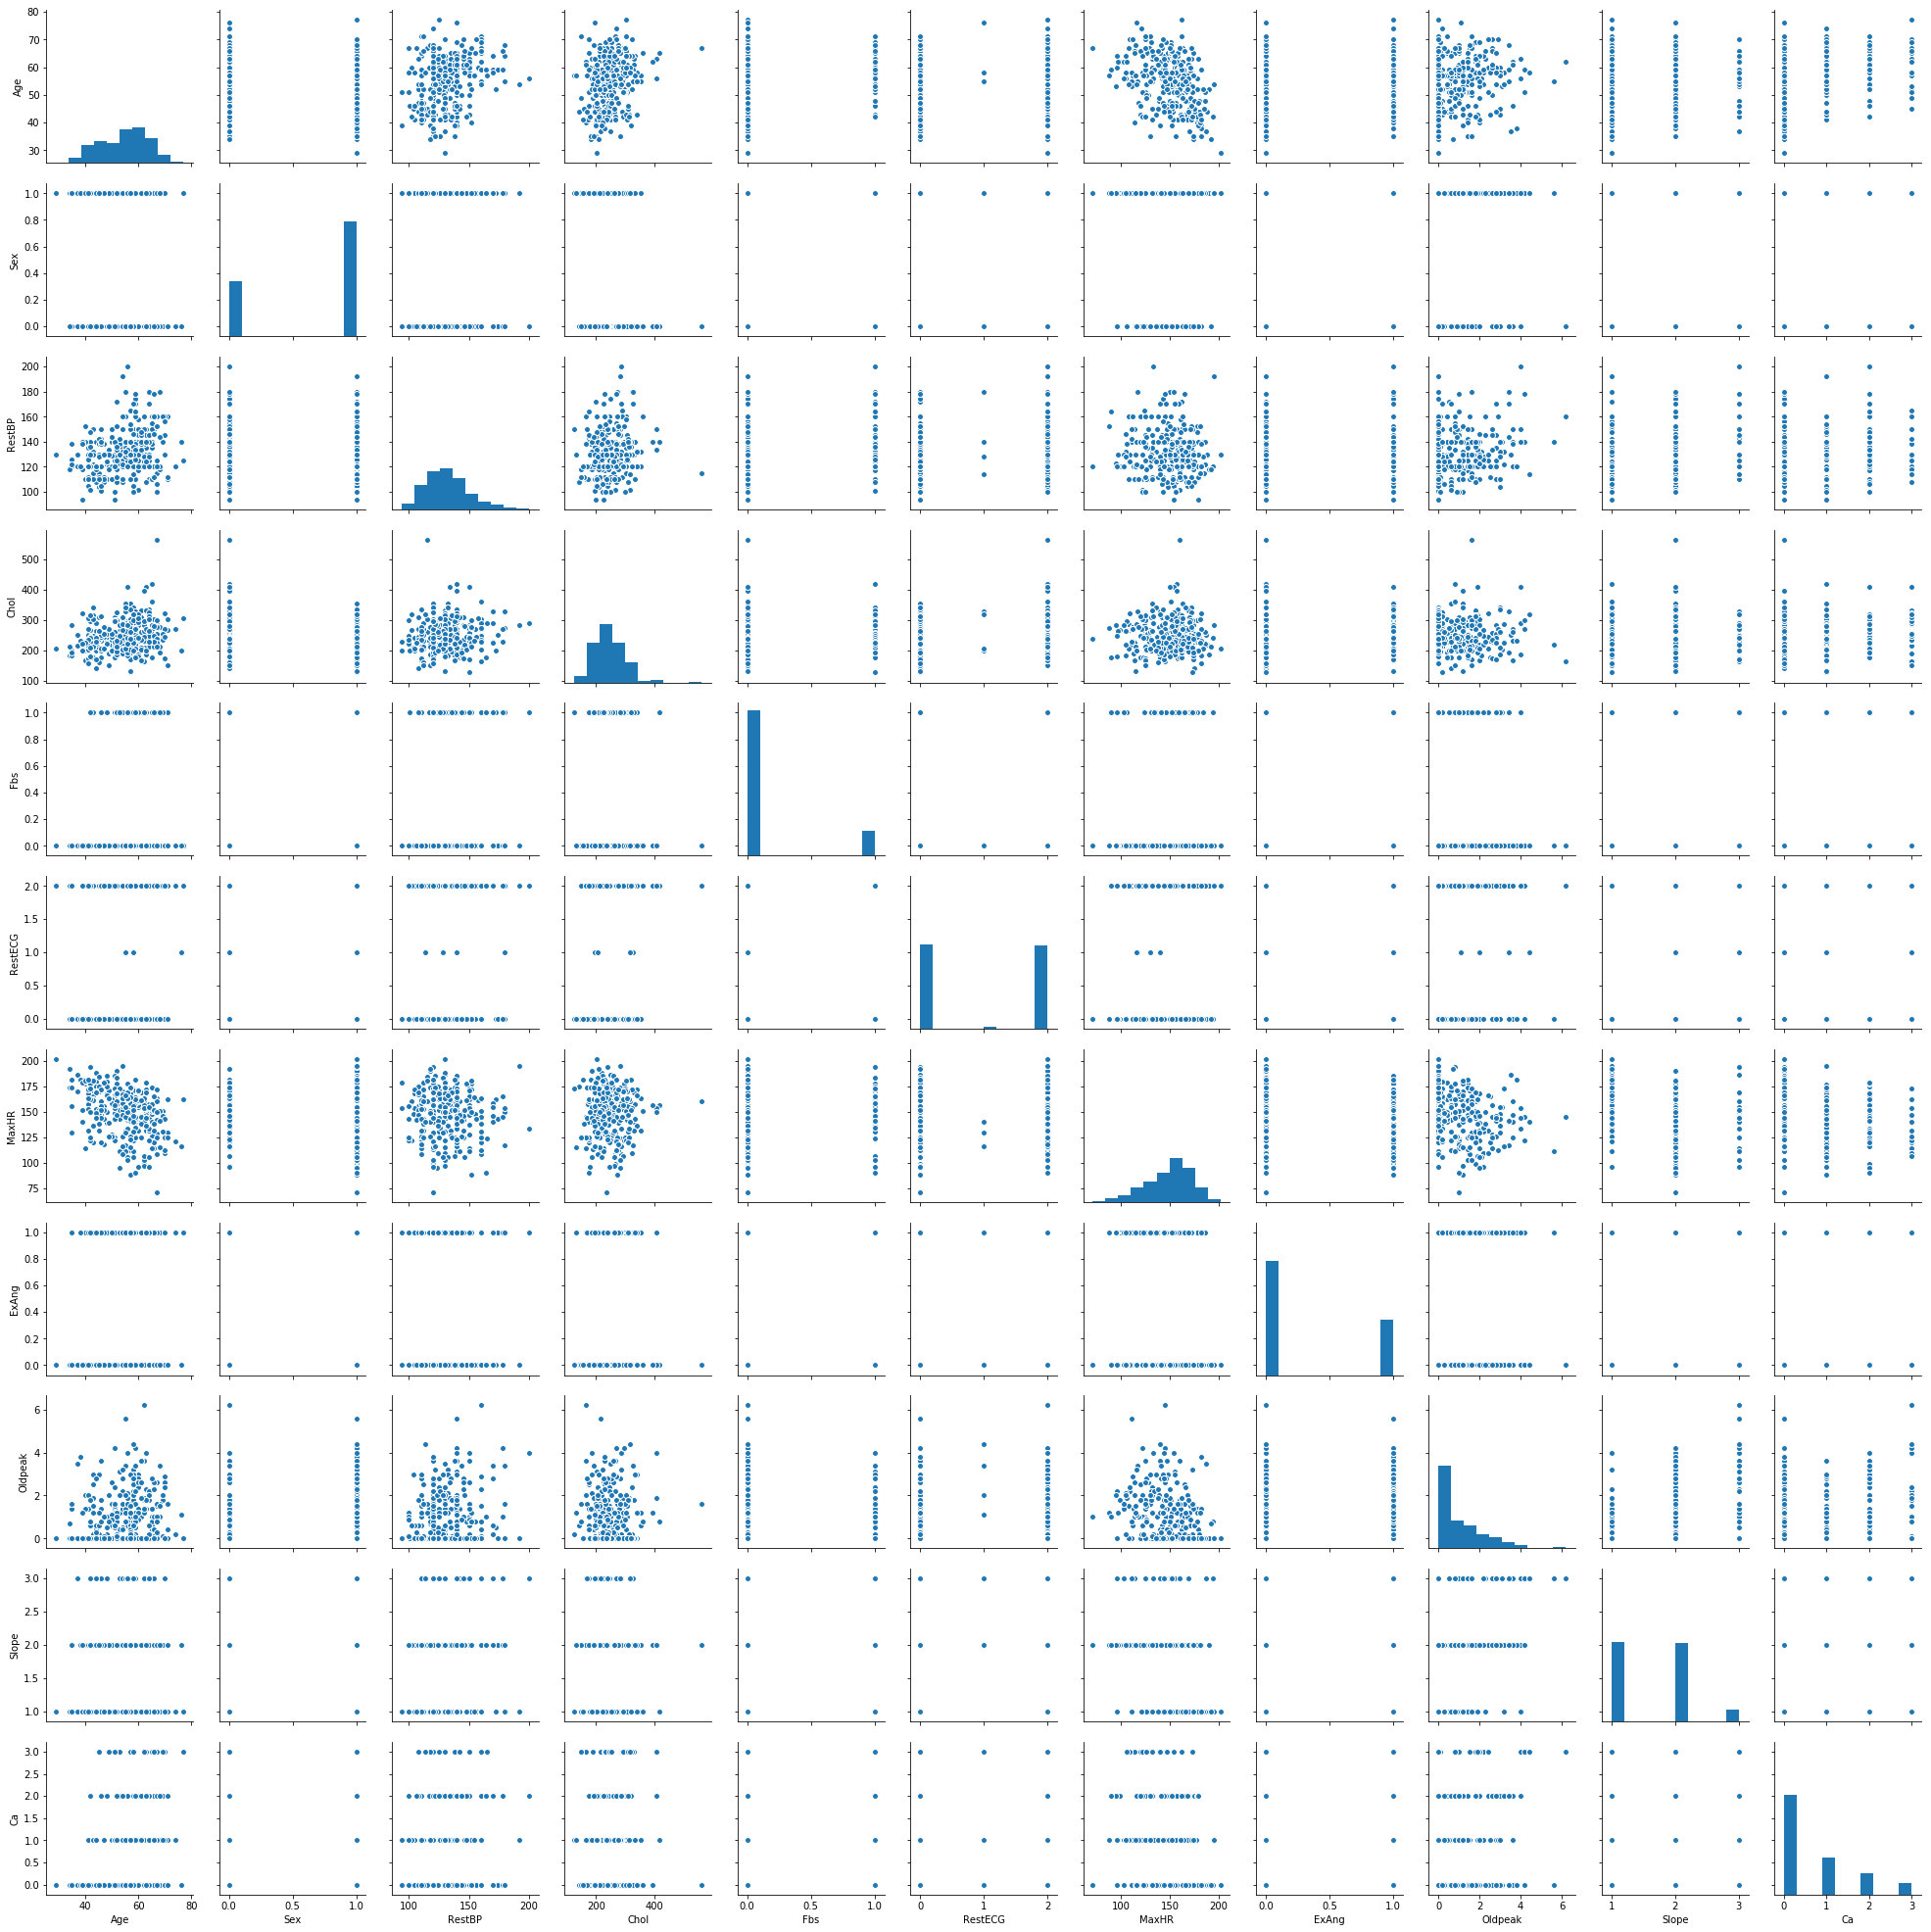

In [8]:
sns.pairplot(df)

In [9]:
data_complete = pd.get_dummies(df,drop_first = True)
data_complete.head(2)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1


In [10]:
x = data_complete.drop('AHD_Yes',axis=1)
y = data_complete[['AHD_Yes']]

# Predict Heart Disease (AHD) using Logistic Regression

 Build a model with better than 90% accuracy

Use 70% train data and 30% test data. Also use random seed 7.

In [11]:
#df[~df.applymap(np.isreal).all(1)]

In [12]:
#Lets analysze the distribution of the various attributes  
#transpose() or we can write T
data_complete.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
Sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
RestBP,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
Chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
Fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
RestECG,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
MaxHR,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
ExAng,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
Oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2
Slope,297.0,1.602694,0.618187,1.0,1.0,2.0,2.0,3.0


In [13]:
data_complete.groupby(["AHD_Yes"]).count()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
AHD_Yes,,,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137


In [14]:
sum(data_complete["AHD_Yes"])

137

In [15]:
data_complete.shape

(297, 17)

In [16]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
type(X_train)

pandas.core.frame.DataFrame

In [17]:
### Fit the model on 70%
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Name\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_train_predict = model.predict(X_train)
y_train_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1], dtype=uint8)

In [19]:
model.intercept_

array([-0.32325272])

In [20]:
model.coef_

array([[-0.03923644,  0.83331428,  0.0205899 ,  0.00747162, -0.20772797,
         0.24850061, -0.03038825,  0.60747694,  0.20010129,  0.54099091,
         1.28588555, -1.358283  , -0.65843315, -0.95303328, -0.70352415,
         1.02273621]])

In [21]:
model.predict_proba(X_train)

array([[5.87547257e-01, 4.12452743e-01],
       [9.40492442e-01, 5.95075578e-02],
       [9.75809587e-01, 2.41904134e-02],
       [1.34952445e-01, 8.65047555e-01],
       [5.96272232e-01, 4.03727768e-01],
       [7.13051857e-01, 2.86948143e-01],
       [9.79585964e-01, 2.04140360e-02],
       [8.62031572e-01, 1.37968428e-01],
       [9.60658660e-01, 3.93413398e-02],
       [8.65692941e-01, 1.34307059e-01],
       [5.28662520e-01, 4.71337480e-01],
       [7.68680723e-02, 9.23131928e-01],
       [8.38291860e-01, 1.61708140e-01],
       [7.28188507e-01, 2.71811493e-01],
       [2.53886411e-02, 9.74611359e-01],
       [8.09340949e-01, 1.90659051e-01],
       [9.00258462e-02, 9.09974154e-01],
       [7.86154781e-01, 2.13845219e-01],
       [7.52756341e-01, 2.47243659e-01],
       [4.43381544e-01, 5.56618456e-01],
       [9.42111806e-01, 5.78881938e-02],
       [5.42429264e-01, 4.57570736e-01],
       [9.81714202e-01, 1.82857978e-02],
       [8.45982137e-01, 1.54017863e-01],
       [9.440411

In [22]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics# train performance
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))

0.8840579710144928
[[103  11]
 [ 13  80]]


In [23]:
y_train['AHD_Yes'].value_counts()

0    114
1     93
Name: AHD_Yes, dtype: int64

In [24]:
# test performance
y_test_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
#cm = metrics.confusion_matrix(y_test, y_test_predict)
#print(cm)

0.8444444444444444


In [25]:
cm = metrics.confusion_matrix(y_test, y_test_predict)
print(cm)

[[42  4]
 [10 34]]


In [26]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5,15,'Predicted label')

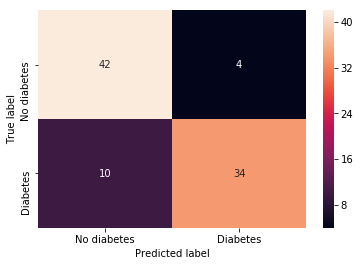

In [27]:
sn.heatmap(cm, annot=True, xticklabels = ["No diabetes", "Diabetes"] , yticklabels = ["No diabetes", "Diabetes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [28]:
len(y_test)

90

In [29]:
x = data_complete.drop('AHD_Yes', axis = 1)
y = data_complete[['AHD_Yes']]

In [30]:
def classficationModelAccuracies(x, y):
    model1 = LogisticRegression()
    ## split data into train and test
    seed = 7
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = seed)
    ## Train the model with train data
    model1.fit(x_train, y_train)
    
    ## Train accuracies
    predictedClass = model1.predict(x_train)
    cMatrix = metrics.confusion_matrix(predictedClass, y_train)
    cMatrix
    # Classification accuracy
    trainClassificationAccuracy = (cMatrix[0][0] + cMatrix[1][1])/sum(sum(cMatrix))
    ## TP percentage
    trainTpPct = (cMatrix[1][1])/(cMatrix[1][0] + cMatrix[1][1])
    ## FP = Flase postive -> does not have disease but predicted as having disease
    # FP percentage
    trainFpPct = (cMatrix[0][1])/(cMatrix[0][0] + cMatrix[0][1])
    trainAccuracies = [len(y_train), trainClassificationAccuracy, trainTpPct, trainFpPct]
    
    ## Test accuracies
    predictedClass = model1.predict(x_test)
    cMatrix = metrics.confusion_matrix(predictedClass, y_test)
    cMatrix
    # Classification accuracy
    testClassificationAccuracy = (cMatrix[0][0] + cMatrix[1][1])/sum(sum(cMatrix))
    ## TP percentage true positive 
    testTpPct = (cMatrix[1][1])/(cMatrix[1][0] + cMatrix[1][1])
    ## FP = Flase postive -> does not have disease but predicted as having disease
    # FP percentage
    testFpPct = (cMatrix[0][1])/(cMatrix[0][0] + cMatrix[0][1])
    testAccuracies = [len(y_test), testClassificationAccuracy, testTpPct, testFpPct]
    
    ## Results
    resultDf = pd.DataFrame(index = ["DataSize", "Accuracy", "True_Positive_Precentage", "False_Positive_Precentage"])
    resultDf['train'] = trainAccuracies
    resultDf['test'] = testAccuracies
    
    return(round(resultDf, 4))

In [31]:

classficationModelAccuracies(x, y)

C:\Users\Name\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,train,test
DataSize,207.0000,90.0000
Accuracy,0.8841,0.8444
True_Positive_Precentage,0.8791,0.8947
False_Positive_Precentage,0.1121,0.1923


In [32]:
data_complete.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_nonanginal',
       'ChestPain_nontypical', 'ChestPain_typical', 'Thal_normal',
       'Thal_reversable', 'AHD_Yes'],
      dtype='object')

In [33]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = data_complete[['Sex','Fbs', 'RestECG', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_nonanginal',
       'ChestPain_nontypical', 'ChestPain_typical', 'Thal_normal',
       'Thal_reversable']]# we need to remove categarical variabel

#VIF Factor
def myVIFfun(x):
    data_mat = x.as_matrix()
    vif = [variance_inflation_factor(data_mat,i)
           for i in range(data_mat.shape[1])]
    vif_factor = pd.DataFrame()
    vif_factor["AHD_Yes"] = x.columns
    vif_factor["vif"] = vif
    return vif_factor 
    

In [34]:
myVIFfun(x)

C:\Users\Name\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


,AHD_Yes,vif
0,Sex,3.199334
1,Fbs,1.252899
2,RestECG,2.100269
3,ExAng,1.989035
4,Oldpeak,3.182334
5,Slope,8.699337
6,Ca,1.796357
7,ChestPain_nonanginal,2.002261
8,ChestPain_nontypical,1.674863
9,ChestPain_typical,1.281800


In [35]:
#x.drop('MaxHR',axis=1,inplace=True)
#myVIFfun(x)

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
x = pd.DataFrame(poly.fit_transform(x))

In [37]:
classficationModelAccuracies(x, y)

C:\Users\Name\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,train,test
DataSize,207.000,90.0000
Accuracy,0.913,0.7778
True_Positive_Precentage,0.931,0.7857
False_Positive_Precentage,0.100,0.2292
